In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

We need to be able to give the probability that a person will experience financial distress in the next two years. All features are ordinal in nature. The target variable is `SeriousDlqin2yrs`. The metric to use for model evaluation is `AUC`.

# Load the training data

In [2]:
df = pd.read_csv('cs-training.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
len(df)

150000

The training set has 150,000 rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

# EDA

##### Descriptive statistics of target = 0

In [23]:
df[df['SeriousDlqin2yrs']==0].drop('SeriousDlqin2yrs', axis=1).describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,139974.000000,139974.000000,139974.000000,139974.000000,1.119120e+05,139974.000000,139974.000000,139974.000000,139974.000000,136229.000000
mean,6.168855,52.751375,0.280109,357.151168,6.747838e+03,8.493620,0.135225,1.020368,0.126666,0.743417
std,256.126350,14.791079,2.946075,2083.282060,1.481350e+04,5.105229,2.909088,1.105512,2.900930,1.105895
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.026983,42.000000,0.000000,0.173707,3.461000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.133288,52.000000,0.000000,0.362659,5.466000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.487686,63.000000,0.000000,0.865608,8.333000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [24]:
df[df['SeriousDlqin2yrs']==1].drop('SeriousDlqin2yrs', axis=1).describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10026.000000,10026.000000,10026.00000,10026.000000,8357.000000,10026.000000,10026.000000,10026.000000,10026.000000,9847.000000
mean,4.367282,45.926591,2.38849,295.121066,5630.826493,7.882306,2.091362,0.988530,1.828047,0.948208
std,131.835778,12.916289,11.73451,1238.360283,6171.719674,5.653601,11.762760,1.425723,11.753068,1.219367
min,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398219,36.000000,0.00000,0.193979,2963.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.838853,45.000000,0.00000,0.428227,4500.000000,7.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,54.000000,2.00000,0.892371,6800.000000,11.000000,1.000000,2.000000,1.000000,2.000000
max,8328.000000,101.000000,98.00000,38793.000000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000


##### Imbalanced dataset?

Text(0, 0.5, ' ')

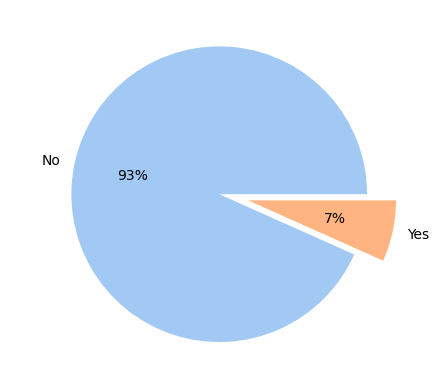

In [5]:
plt.figure()
colors = sns.color_palette('pastel')
df["SeriousDlqin2yrs"].value_counts().plot(kind='pie', 
                                labels=["No", "Yes"], 
                                colors=colors, 
                                autopct = '%0.0f%%', 
                                explode=[0, .2])
plt.ylabel(" ")

##### Pairplot

In [6]:
# plt.figure(figsize=(20,20))
# sns.pairplot(data=df, hue="SeriousDlqin2yrs")

##### Distributions

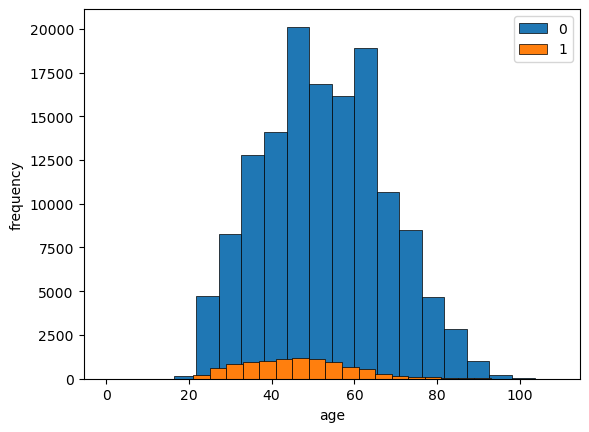

In [27]:
plt.figure()
plt.hist(df[df['SeriousDlqin2yrs']==0]['age'].values, bins=20, edgecolor='black', linewidth=.5, label='0')
plt.hist(df[df['SeriousDlqin2yrs']==1]['age'].values, bins=20, edgecolor='black', linewidth=.5, label='1')
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend()

In [31]:
df[df['SeriousDlqin2yrs']==0]['MonthlyIncome'].mean()

6747.837774322682

In [32]:
df[df['SeriousDlqin2yrs']==1]['MonthlyIncome'].mean()

5630.82649276056

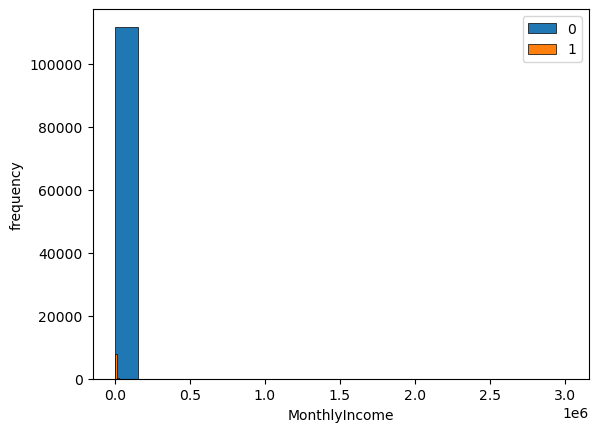

In [28]:
plt.figure()
plt.hist(df[df['SeriousDlqin2yrs']==0]['MonthlyIncome'].values, bins=20, edgecolor='black', linewidth=.5, label='0')
plt.hist(df[df['SeriousDlqin2yrs']==1]['MonthlyIncome'].values, bins=20, edgecolor='black', linewidth=.5, label='1')
plt.xlabel('MonthlyIncome')
plt.ylabel('frequency')
plt.legend()

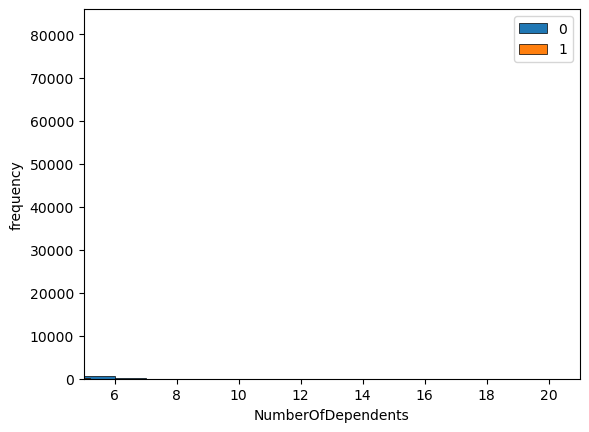

In [34]:
plt.figure()
plt.hist(df[df['SeriousDlqin2yrs']==0]['NumberOfDependents'].values, bins=20, edgecolor='black', linewidth=.5, label='0')
plt.hist(df[df['SeriousDlqin2yrs']==1]['NumberOfDependents'].values, bins=20, edgecolor='black', linewidth=.5, label='1')
plt.xlabel('NumberOfDependents')
plt.ylabel('frequency')
plt.xlim(5)
plt.legend()

In [ ]:
plt.figure()
plot = sns.histplot(data=df, x='RevolvingUtilizationOfUnsecuredLines', hue='SeriousDlqin2yrs', kde=True, multiple="stack")
plot.set(title='RevolvingUtilizationOfUnsecuredLines', xlabel=None)

In [ ]:
plt.figure()
plot = sns.histplot(data=df, x='age', hue='SeriousDlqin2yrs', kde=True, multiple="stack")
plot.set(title='age', xlabel=None)

In [ ]:
fig, axes = plt.subplots(1, 3)

sns.set(rc={'figure.figsize':(9, 3)})
for col_name, ax in zip(df.drop('SeriousDlqin2yrs', axis=1).columns.to_list(), axes.flatten()):
    plot = sns.histplot(data=df, x=col_name, hue='SeriousDlqin2yrs', ax=ax, kde=True, multiple="stack")
    plot.set(title=col_name, xlabel=None)

plt.tight_layout()